## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import californiaDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 


In [3]:
X,Y = californiaDataset.california_data()
n_features = 8 
n_samples = 20640
n_target = 1 

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.607
Model:                            OLS   Adj. R-squared (uncentered):              0.607
Method:                 Least Squares   F-statistic:                              3183.
Date:                Fri, 24 Dec 2021   Prob (F-statistic):                        0.00
Time:                        19:18:10   Log-Likelihood:                         -15783.
No. Observations:               16512   AIC:                                  3.158e+04
Df Residuals:                   16504   BIC:                                  3.164e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

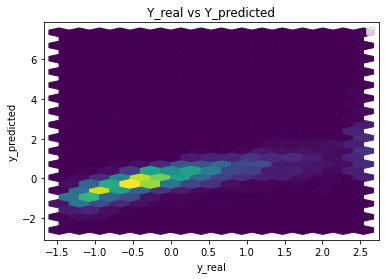

Performance Metrics
Mean Squared Error: 0.3870953048464356
Mean Absolute Error: 0.45146145531630194
Manhattan distance: 1863.6328875456934
Euclidean distance: 39.97410935100483


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.382015340864156


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.064294
0:	learn: 0.9622572	total: 60.2ms	remaining: 1m
1:	learn: 0.9308284	total: 63ms	remaining: 31.4s
2:	learn: 0.9013863	total: 65.8ms	remaining: 21.9s
3:	learn: 0.8735819	total: 68.3ms	remaining: 17s
4:	learn: 0.8473015	total: 70.8ms	remaining: 14.1s
5:	learn: 0.8239271	total: 73.8ms	remaining: 12.2s
6:	learn: 0.8021770	total: 76.4ms	remaining: 10.8s
7:	learn: 0.7814854	total: 79.1ms	remaining: 9.8s
8:	learn: 0.7620614	total: 82.4ms	remaining: 9.07s
9:	learn: 0.7434409	total: 85.2ms	remaining: 8.44s
10:	learn: 0.7272504	total: 90.2ms	remaining: 8.11s
11:	learn: 0.7122205	total: 92.9ms	remaining: 7.65s
12:	learn: 0.6977399	total: 95.5ms	remaining: 7.25s
13:	learn: 0.6839809	total: 98ms	remaining: 6.9s
14:	learn: 0.6727458	total: 101ms	remaining: 6.61s
15:	learn: 0.6619837	total: 103ms	remaining: 6.33s
16:	learn: 0.6526815	total: 105ms	remaining: 6.07s
17:	learn: 0.6425549	total: 108ms	remaining: 5.87s
18:	learn: 0.6339301	total: 110ms	remaining: 5.7s
19:	learn

23:	learn: 0.5977407	total: 123ms	remaining: 5.02s
24:	learn: 0.5905962	total: 126ms	remaining: 4.91s
25:	learn: 0.5834906	total: 128ms	remaining: 4.81s
26:	learn: 0.5769621	total: 131ms	remaining: 4.72s
27:	learn: 0.5723533	total: 134ms	remaining: 4.66s
28:	learn: 0.5675585	total: 137ms	remaining: 4.6s
29:	learn: 0.5634180	total: 140ms	remaining: 4.54s
30:	learn: 0.5597424	total: 143ms	remaining: 4.47s
31:	learn: 0.5565619	total: 146ms	remaining: 4.4s
32:	learn: 0.5531242	total: 148ms	remaining: 4.34s
33:	learn: 0.5502150	total: 150ms	remaining: 4.26s
34:	learn: 0.5457322	total: 153ms	remaining: 4.21s
35:	learn: 0.5417108	total: 155ms	remaining: 4.16s
36:	learn: 0.5371746	total: 159ms	remaining: 4.14s
37:	learn: 0.5330518	total: 162ms	remaining: 4.09s
38:	learn: 0.5304554	total: 164ms	remaining: 4.04s
39:	learn: 0.5276281	total: 166ms	remaining: 3.99s
40:	learn: 0.5253843	total: 169ms	remaining: 3.94s
41:	learn: 0.5233260	total: 171ms	remaining: 3.91s
42:	learn: 0.5208519	total: 174ms

49:	learn: 0.5042626	total: 193ms	remaining: 3.67s
50:	learn: 0.5017426	total: 196ms	remaining: 3.65s
51:	learn: 0.5001539	total: 199ms	remaining: 3.62s
52:	learn: 0.4979475	total: 201ms	remaining: 3.6s
53:	learn: 0.4970349	total: 204ms	remaining: 3.58s
54:	learn: 0.4943376	total: 206ms	remaining: 3.54s
55:	learn: 0.4930772	total: 209ms	remaining: 3.52s
56:	learn: 0.4918676	total: 211ms	remaining: 3.5s
57:	learn: 0.4899398	total: 214ms	remaining: 3.48s
58:	learn: 0.4883585	total: 217ms	remaining: 3.46s
59:	learn: 0.4868605	total: 220ms	remaining: 3.45s
60:	learn: 0.4849168	total: 222ms	remaining: 3.42s
61:	learn: 0.4838135	total: 225ms	remaining: 3.4s
62:	learn: 0.4828894	total: 227ms	remaining: 3.38s
63:	learn: 0.4814094	total: 230ms	remaining: 3.36s
64:	learn: 0.4802736	total: 232ms	remaining: 3.33s
65:	learn: 0.4795860	total: 234ms	remaining: 3.32s
66:	learn: 0.4784417	total: 237ms	remaining: 3.3s
67:	learn: 0.4774334	total: 239ms	remaining: 3.28s
68:	learn: 0.4764621	total: 242ms	r

93:	learn: 0.4550481	total: 316ms	remaining: 3.05s
94:	learn: 0.4545470	total: 319ms	remaining: 3.04s
95:	learn: 0.4537512	total: 321ms	remaining: 3.02s
96:	learn: 0.4534087	total: 324ms	remaining: 3.01s
97:	learn: 0.4527511	total: 327ms	remaining: 3s
98:	learn: 0.4523769	total: 330ms	remaining: 3s
99:	learn: 0.4515816	total: 332ms	remaining: 2.99s
100:	learn: 0.4508231	total: 335ms	remaining: 2.98s
101:	learn: 0.4501774	total: 339ms	remaining: 2.98s
102:	learn: 0.4496309	total: 342ms	remaining: 2.98s
103:	learn: 0.4488778	total: 344ms	remaining: 2.97s
104:	learn: 0.4479720	total: 348ms	remaining: 2.96s
105:	learn: 0.4476325	total: 351ms	remaining: 2.96s
106:	learn: 0.4470584	total: 354ms	remaining: 2.95s
107:	learn: 0.4465497	total: 356ms	remaining: 2.94s
108:	learn: 0.4457201	total: 359ms	remaining: 2.94s
109:	learn: 0.4453597	total: 362ms	remaining: 2.93s
110:	learn: 0.4450189	total: 365ms	remaining: 2.92s
111:	learn: 0.4445517	total: 367ms	remaining: 2.91s
112:	learn: 0.4438864	tot

118:	learn: 0.4407085	total: 385ms	remaining: 2.85s
119:	learn: 0.4399428	total: 388ms	remaining: 2.85s
120:	learn: 0.4394965	total: 391ms	remaining: 2.84s
121:	learn: 0.4391622	total: 394ms	remaining: 2.83s
122:	learn: 0.4387626	total: 397ms	remaining: 2.83s
123:	learn: 0.4379125	total: 399ms	remaining: 2.82s
124:	learn: 0.4375576	total: 402ms	remaining: 2.81s
125:	learn: 0.4369614	total: 404ms	remaining: 2.8s
126:	learn: 0.4362712	total: 407ms	remaining: 2.79s
127:	learn: 0.4357862	total: 409ms	remaining: 2.79s
128:	learn: 0.4352881	total: 412ms	remaining: 2.78s
129:	learn: 0.4348717	total: 414ms	remaining: 2.77s
130:	learn: 0.4343908	total: 417ms	remaining: 2.77s
131:	learn: 0.4338986	total: 420ms	remaining: 2.76s
132:	learn: 0.4336570	total: 423ms	remaining: 2.75s
133:	learn: 0.4331401	total: 425ms	remaining: 2.75s
134:	learn: 0.4323864	total: 428ms	remaining: 2.74s
135:	learn: 0.4318636	total: 430ms	remaining: 2.73s
136:	learn: 0.4313843	total: 432ms	remaining: 2.72s
137:	learn: 0

163:	learn: 0.4196381	total: 510ms	remaining: 2.6s
164:	learn: 0.4192741	total: 513ms	remaining: 2.59s
165:	learn: 0.4188112	total: 515ms	remaining: 2.59s
166:	learn: 0.4182940	total: 519ms	remaining: 2.59s
167:	learn: 0.4178621	total: 522ms	remaining: 2.58s
168:	learn: 0.4174009	total: 524ms	remaining: 2.58s
169:	learn: 0.4170350	total: 527ms	remaining: 2.57s
170:	learn: 0.4164386	total: 530ms	remaining: 2.57s
171:	learn: 0.4159759	total: 532ms	remaining: 2.56s
172:	learn: 0.4156828	total: 535ms	remaining: 2.56s
173:	learn: 0.4151401	total: 538ms	remaining: 2.55s
174:	learn: 0.4148529	total: 541ms	remaining: 2.55s
175:	learn: 0.4145996	total: 544ms	remaining: 2.54s
176:	learn: 0.4142370	total: 546ms	remaining: 2.54s
177:	learn: 0.4137707	total: 549ms	remaining: 2.53s
178:	learn: 0.4133198	total: 552ms	remaining: 2.53s
179:	learn: 0.4128659	total: 555ms	remaining: 2.53s
180:	learn: 0.4125360	total: 557ms	remaining: 2.52s
181:	learn: 0.4120713	total: 560ms	remaining: 2.52s
182:	learn: 0

188:	learn: 0.4095641	total: 579ms	remaining: 2.48s
189:	learn: 0.4093461	total: 582ms	remaining: 2.48s
190:	learn: 0.4088638	total: 585ms	remaining: 2.48s
191:	learn: 0.4084250	total: 588ms	remaining: 2.48s
192:	learn: 0.4080563	total: 591ms	remaining: 2.47s
193:	learn: 0.4077051	total: 593ms	remaining: 2.46s
194:	learn: 0.4074173	total: 596ms	remaining: 2.46s
195:	learn: 0.4069650	total: 598ms	remaining: 2.45s
196:	learn: 0.4066844	total: 601ms	remaining: 2.45s
197:	learn: 0.4062111	total: 604ms	remaining: 2.44s
198:	learn: 0.4057665	total: 606ms	remaining: 2.44s
199:	learn: 0.4055147	total: 609ms	remaining: 2.44s
200:	learn: 0.4050831	total: 611ms	remaining: 2.43s
201:	learn: 0.4046612	total: 614ms	remaining: 2.42s
202:	learn: 0.4041177	total: 617ms	remaining: 2.42s
203:	learn: 0.4038691	total: 620ms	remaining: 2.42s
204:	learn: 0.4035661	total: 622ms	remaining: 2.41s
205:	learn: 0.4030834	total: 625ms	remaining: 2.41s
206:	learn: 0.4027210	total: 628ms	remaining: 2.4s
207:	learn: 0

232:	learn: 0.3947491	total: 703ms	remaining: 2.31s
233:	learn: 0.3944836	total: 706ms	remaining: 2.31s
234:	learn: 0.3941672	total: 709ms	remaining: 2.31s
235:	learn: 0.3938555	total: 712ms	remaining: 2.3s
236:	learn: 0.3935603	total: 714ms	remaining: 2.3s
237:	learn: 0.3933796	total: 717ms	remaining: 2.29s
238:	learn: 0.3930850	total: 720ms	remaining: 2.29s
239:	learn: 0.3927619	total: 722ms	remaining: 2.29s
240:	learn: 0.3924397	total: 725ms	remaining: 2.28s
241:	learn: 0.3921531	total: 729ms	remaining: 2.28s
242:	learn: 0.3918614	total: 732ms	remaining: 2.28s
243:	learn: 0.3915824	total: 735ms	remaining: 2.28s
244:	learn: 0.3914099	total: 737ms	remaining: 2.27s
245:	learn: 0.3912336	total: 740ms	remaining: 2.27s
246:	learn: 0.3909752	total: 743ms	remaining: 2.26s
247:	learn: 0.3908462	total: 745ms	remaining: 2.26s
248:	learn: 0.3905711	total: 748ms	remaining: 2.25s
249:	learn: 0.3903721	total: 750ms	remaining: 2.25s
250:	learn: 0.3901722	total: 753ms	remaining: 2.25s
251:	learn: 0.

257:	learn: 0.3882263	total: 776ms	remaining: 2.23s
258:	learn: 0.3879889	total: 778ms	remaining: 2.23s
259:	learn: 0.3876783	total: 781ms	remaining: 2.22s
260:	learn: 0.3873906	total: 784ms	remaining: 2.22s
261:	learn: 0.3872224	total: 786ms	remaining: 2.21s
262:	learn: 0.3869335	total: 789ms	remaining: 2.21s
263:	learn: 0.3867306	total: 792ms	remaining: 2.21s
264:	learn: 0.3865576	total: 795ms	remaining: 2.2s
265:	learn: 0.3863644	total: 797ms	remaining: 2.2s
266:	learn: 0.3861115	total: 800ms	remaining: 2.19s
267:	learn: 0.3858629	total: 802ms	remaining: 2.19s
268:	learn: 0.3856925	total: 806ms	remaining: 2.19s
269:	learn: 0.3854855	total: 810ms	remaining: 2.19s
270:	learn: 0.3853438	total: 813ms	remaining: 2.19s
271:	learn: 0.3851761	total: 816ms	remaining: 2.18s
272:	learn: 0.3848565	total: 819ms	remaining: 2.18s
273:	learn: 0.3847116	total: 821ms	remaining: 2.18s
274:	learn: 0.3844676	total: 825ms	remaining: 2.17s
275:	learn: 0.3842614	total: 828ms	remaining: 2.17s
276:	learn: 0.

299:	learn: 0.3786486	total: 896ms	remaining: 2.09s
300:	learn: 0.3785244	total: 900ms	remaining: 2.09s
301:	learn: 0.3782468	total: 903ms	remaining: 2.09s
302:	learn: 0.3779847	total: 906ms	remaining: 2.08s
303:	learn: 0.3778112	total: 909ms	remaining: 2.08s
304:	learn: 0.3776512	total: 912ms	remaining: 2.08s
305:	learn: 0.3773639	total: 915ms	remaining: 2.08s
306:	learn: 0.3771523	total: 917ms	remaining: 2.07s
307:	learn: 0.3768608	total: 920ms	remaining: 2.07s
308:	learn: 0.3766985	total: 923ms	remaining: 2.06s
309:	learn: 0.3765379	total: 926ms	remaining: 2.06s
310:	learn: 0.3763301	total: 928ms	remaining: 2.06s
311:	learn: 0.3761076	total: 931ms	remaining: 2.05s
312:	learn: 0.3758804	total: 933ms	remaining: 2.05s
313:	learn: 0.3757253	total: 936ms	remaining: 2.04s
314:	learn: 0.3754298	total: 943ms	remaining: 2.05s
315:	learn: 0.3751623	total: 950ms	remaining: 2.06s
316:	learn: 0.3749843	total: 953ms	remaining: 2.05s
317:	learn: 0.3748829	total: 957ms	remaining: 2.05s
318:	learn: 

319:	learn: 0.3744399	total: 968ms	remaining: 2.06s
320:	learn: 0.3743144	total: 971ms	remaining: 2.05s
321:	learn: 0.3739985	total: 974ms	remaining: 2.05s
322:	learn: 0.3738261	total: 977ms	remaining: 2.05s
323:	learn: 0.3735972	total: 980ms	remaining: 2.04s
324:	learn: 0.3733696	total: 984ms	remaining: 2.04s
325:	learn: 0.3731429	total: 987ms	remaining: 2.04s
326:	learn: 0.3730529	total: 989ms	remaining: 2.04s
327:	learn: 0.3727999	total: 992ms	remaining: 2.03s
328:	learn: 0.3724414	total: 996ms	remaining: 2.03s
329:	learn: 0.3722361	total: 999ms	remaining: 2.03s
330:	learn: 0.3720708	total: 1s	remaining: 2.02s
331:	learn: 0.3717735	total: 1s	remaining: 2.02s
332:	learn: 0.3715916	total: 1.01s	remaining: 2.02s
333:	learn: 0.3714092	total: 1.01s	remaining: 2.01s
334:	learn: 0.3711392	total: 1.01s	remaining: 2.01s
335:	learn: 0.3709860	total: 1.02s	remaining: 2.01s
336:	learn: 0.3708192	total: 1.02s	remaining: 2s
337:	learn: 0.3705802	total: 1.02s	remaining: 2s
338:	learn: 0.3704518	to

360:	learn: 0.3666646	total: 1.08s	remaining: 1.92s
361:	learn: 0.3664085	total: 1.09s	remaining: 1.92s
362:	learn: 0.3661056	total: 1.09s	remaining: 1.91s
363:	learn: 0.3659003	total: 1.09s	remaining: 1.91s
364:	learn: 0.3657676	total: 1.1s	remaining: 1.91s
365:	learn: 0.3654177	total: 1.1s	remaining: 1.9s
366:	learn: 0.3652152	total: 1.1s	remaining: 1.9s
367:	learn: 0.3650657	total: 1.1s	remaining: 1.9s
368:	learn: 0.3649402	total: 1.11s	remaining: 1.89s
369:	learn: 0.3648163	total: 1.11s	remaining: 1.89s
370:	learn: 0.3646721	total: 1.11s	remaining: 1.88s
371:	learn: 0.3645020	total: 1.11s	remaining: 1.88s
372:	learn: 0.3642650	total: 1.12s	remaining: 1.88s
373:	learn: 0.3641171	total: 1.12s	remaining: 1.87s
374:	learn: 0.3639801	total: 1.12s	remaining: 1.87s
375:	learn: 0.3638449	total: 1.13s	remaining: 1.87s
376:	learn: 0.3636465	total: 1.13s	remaining: 1.87s
377:	learn: 0.3635544	total: 1.13s	remaining: 1.86s
378:	learn: 0.3632874	total: 1.13s	remaining: 1.86s
379:	learn: 0.36313

388:	learn: 0.3615056	total: 1.16s	remaining: 1.82s
389:	learn: 0.3612780	total: 1.16s	remaining: 1.82s
390:	learn: 0.3611503	total: 1.17s	remaining: 1.81s
391:	learn: 0.3610072	total: 1.17s	remaining: 1.81s
392:	learn: 0.3608832	total: 1.17s	remaining: 1.81s
393:	learn: 0.3607194	total: 1.17s	remaining: 1.8s
394:	learn: 0.3606681	total: 1.18s	remaining: 1.8s
395:	learn: 0.3604378	total: 1.18s	remaining: 1.8s
396:	learn: 0.3602671	total: 1.18s	remaining: 1.79s
397:	learn: 0.3600473	total: 1.18s	remaining: 1.79s
398:	learn: 0.3598309	total: 1.19s	remaining: 1.78s
399:	learn: 0.3596112	total: 1.19s	remaining: 1.78s
400:	learn: 0.3594557	total: 1.19s	remaining: 1.78s
401:	learn: 0.3593042	total: 1.19s	remaining: 1.77s
402:	learn: 0.3591298	total: 1.2s	remaining: 1.77s
403:	learn: 0.3589730	total: 1.2s	remaining: 1.77s
404:	learn: 0.3588198	total: 1.2s	remaining: 1.76s
405:	learn: 0.3586692	total: 1.2s	remaining: 1.76s
406:	learn: 0.3585510	total: 1.21s	remaining: 1.76s
407:	learn: 0.35839

435:	learn: 0.3540902	total: 1.28s	remaining: 1.66s
436:	learn: 0.3538113	total: 1.28s	remaining: 1.65s
437:	learn: 0.3536286	total: 1.28s	remaining: 1.65s
438:	learn: 0.3534176	total: 1.29s	remaining: 1.65s
439:	learn: 0.3532944	total: 1.29s	remaining: 1.64s
440:	learn: 0.3529671	total: 1.29s	remaining: 1.64s
441:	learn: 0.3528754	total: 1.3s	remaining: 1.64s
442:	learn: 0.3527294	total: 1.3s	remaining: 1.64s
443:	learn: 0.3524950	total: 1.3s	remaining: 1.63s
444:	learn: 0.3523421	total: 1.31s	remaining: 1.63s
445:	learn: 0.3522219	total: 1.31s	remaining: 1.63s
446:	learn: 0.3520047	total: 1.32s	remaining: 1.63s
447:	learn: 0.3518473	total: 1.32s	remaining: 1.63s
448:	learn: 0.3517466	total: 1.32s	remaining: 1.62s
449:	learn: 0.3516533	total: 1.33s	remaining: 1.62s
450:	learn: 0.3514529	total: 1.33s	remaining: 1.62s
451:	learn: 0.3513562	total: 1.33s	remaining: 1.62s
452:	learn: 0.3512263	total: 1.34s	remaining: 1.62s
453:	learn: 0.3511031	total: 1.34s	remaining: 1.61s
454:	learn: 0.3

457:	learn: 0.3504917	total: 1.35s	remaining: 1.6s
458:	learn: 0.3503057	total: 1.36s	remaining: 1.6s
459:	learn: 0.3501537	total: 1.36s	remaining: 1.6s
460:	learn: 0.3500148	total: 1.36s	remaining: 1.59s
461:	learn: 0.3498889	total: 1.37s	remaining: 1.59s
462:	learn: 0.3496479	total: 1.37s	remaining: 1.59s
463:	learn: 0.3494256	total: 1.37s	remaining: 1.58s
464:	learn: 0.3492832	total: 1.38s	remaining: 1.58s
465:	learn: 0.3490756	total: 1.38s	remaining: 1.58s
466:	learn: 0.3489779	total: 1.38s	remaining: 1.58s
467:	learn: 0.3488097	total: 1.38s	remaining: 1.57s
468:	learn: 0.3486765	total: 1.39s	remaining: 1.57s
469:	learn: 0.3485964	total: 1.39s	remaining: 1.57s
470:	learn: 0.3484020	total: 1.39s	remaining: 1.56s
471:	learn: 0.3482669	total: 1.4s	remaining: 1.56s
472:	learn: 0.3481909	total: 1.4s	remaining: 1.56s
473:	learn: 0.3480687	total: 1.4s	remaining: 1.55s
474:	learn: 0.3478446	total: 1.4s	remaining: 1.55s
475:	learn: 0.3477272	total: 1.41s	remaining: 1.55s
476:	learn: 0.34762

497:	learn: 0.3447208	total: 1.47s	remaining: 1.48s
498:	learn: 0.3446294	total: 1.47s	remaining: 1.48s
499:	learn: 0.3444855	total: 1.48s	remaining: 1.48s
500:	learn: 0.3443486	total: 1.48s	remaining: 1.47s
501:	learn: 0.3442074	total: 1.48s	remaining: 1.47s
502:	learn: 0.3440543	total: 1.49s	remaining: 1.47s
503:	learn: 0.3438262	total: 1.49s	remaining: 1.46s
504:	learn: 0.3437114	total: 1.49s	remaining: 1.46s
505:	learn: 0.3434894	total: 1.49s	remaining: 1.46s
506:	learn: 0.3433488	total: 1.5s	remaining: 1.46s
507:	learn: 0.3432039	total: 1.5s	remaining: 1.45s
508:	learn: 0.3431284	total: 1.5s	remaining: 1.45s
509:	learn: 0.3430058	total: 1.5s	remaining: 1.45s
510:	learn: 0.3429420	total: 1.51s	remaining: 1.44s
511:	learn: 0.3428268	total: 1.51s	remaining: 1.44s
512:	learn: 0.3426629	total: 1.51s	remaining: 1.44s
513:	learn: 0.3425491	total: 1.51s	remaining: 1.43s
514:	learn: 0.3423910	total: 1.52s	remaining: 1.43s
515:	learn: 0.3422635	total: 1.52s	remaining: 1.43s
516:	learn: 0.34

525:	learn: 0.3409325	total: 1.55s	remaining: 1.4s
526:	learn: 0.3407600	total: 1.55s	remaining: 1.39s
527:	learn: 0.3406783	total: 1.55s	remaining: 1.39s
528:	learn: 0.3405414	total: 1.56s	remaining: 1.39s
529:	learn: 0.3404222	total: 1.56s	remaining: 1.38s
530:	learn: 0.3403336	total: 1.56s	remaining: 1.38s
531:	learn: 0.3402425	total: 1.56s	remaining: 1.38s
532:	learn: 0.3400983	total: 1.57s	remaining: 1.37s
533:	learn: 0.3399765	total: 1.57s	remaining: 1.37s
534:	learn: 0.3398106	total: 1.57s	remaining: 1.37s
535:	learn: 0.3396646	total: 1.57s	remaining: 1.36s
536:	learn: 0.3395876	total: 1.58s	remaining: 1.36s
537:	learn: 0.3394721	total: 1.58s	remaining: 1.36s
538:	learn: 0.3392731	total: 1.58s	remaining: 1.35s
539:	learn: 0.3391261	total: 1.59s	remaining: 1.35s
540:	learn: 0.3390109	total: 1.59s	remaining: 1.35s
541:	learn: 0.3388725	total: 1.59s	remaining: 1.35s
542:	learn: 0.3388231	total: 1.59s	remaining: 1.34s
543:	learn: 0.3386451	total: 1.6s	remaining: 1.34s
544:	learn: 0.

568:	learn: 0.3357388	total: 1.67s	remaining: 1.26s
569:	learn: 0.3355785	total: 1.67s	remaining: 1.26s
570:	learn: 0.3354219	total: 1.67s	remaining: 1.25s
571:	learn: 0.3351987	total: 1.67s	remaining: 1.25s
572:	learn: 0.3350921	total: 1.68s	remaining: 1.25s
573:	learn: 0.3349651	total: 1.68s	remaining: 1.25s
574:	learn: 0.3348602	total: 1.68s	remaining: 1.24s
575:	learn: 0.3347545	total: 1.69s	remaining: 1.24s
576:	learn: 0.3346164	total: 1.69s	remaining: 1.24s
577:	learn: 0.3345155	total: 1.69s	remaining: 1.23s
578:	learn: 0.3343868	total: 1.69s	remaining: 1.23s
579:	learn: 0.3342312	total: 1.7s	remaining: 1.23s
580:	learn: 0.3341180	total: 1.7s	remaining: 1.23s
581:	learn: 0.3339951	total: 1.7s	remaining: 1.22s
582:	learn: 0.3339018	total: 1.7s	remaining: 1.22s
583:	learn: 0.3338334	total: 1.71s	remaining: 1.22s
584:	learn: 0.3337214	total: 1.71s	remaining: 1.21s
585:	learn: 0.3336294	total: 1.71s	remaining: 1.21s
586:	learn: 0.3335168	total: 1.71s	remaining: 1.21s
587:	learn: 0.33

596:	learn: 0.3323955	total: 1.74s	remaining: 1.18s
597:	learn: 0.3323286	total: 1.74s	remaining: 1.17s
598:	learn: 0.3322207	total: 1.75s	remaining: 1.17s
599:	learn: 0.3320861	total: 1.75s	remaining: 1.17s
600:	learn: 0.3319428	total: 1.75s	remaining: 1.16s
601:	learn: 0.3318324	total: 1.76s	remaining: 1.16s
602:	learn: 0.3317357	total: 1.76s	remaining: 1.16s
603:	learn: 0.3316672	total: 1.76s	remaining: 1.16s
604:	learn: 0.3315453	total: 1.76s	remaining: 1.15s
605:	learn: 0.3314279	total: 1.77s	remaining: 1.15s
606:	learn: 0.3313008	total: 1.77s	remaining: 1.15s
607:	learn: 0.3311474	total: 1.77s	remaining: 1.14s
608:	learn: 0.3310822	total: 1.78s	remaining: 1.14s
609:	learn: 0.3309935	total: 1.78s	remaining: 1.14s
610:	learn: 0.3309068	total: 1.78s	remaining: 1.13s
611:	learn: 0.3308123	total: 1.78s	remaining: 1.13s
612:	learn: 0.3306773	total: 1.79s	remaining: 1.13s
613:	learn: 0.3306077	total: 1.79s	remaining: 1.13s
614:	learn: 0.3304807	total: 1.79s	remaining: 1.12s
615:	learn: 

639:	learn: 0.3275908	total: 1.86s	remaining: 1.05s
640:	learn: 0.3274976	total: 1.86s	remaining: 1.04s
641:	learn: 0.3273783	total: 1.86s	remaining: 1.04s
642:	learn: 0.3271984	total: 1.87s	remaining: 1.04s
643:	learn: 0.3270876	total: 1.87s	remaining: 1.03s
644:	learn: 0.3269060	total: 1.87s	remaining: 1.03s
645:	learn: 0.3267916	total: 1.88s	remaining: 1.03s
646:	learn: 0.3267023	total: 1.88s	remaining: 1.02s
647:	learn: 0.3266025	total: 1.88s	remaining: 1.02s
648:	learn: 0.3264965	total: 1.88s	remaining: 1.02s
649:	learn: 0.3264032	total: 1.88s	remaining: 1.01s
650:	learn: 0.3263060	total: 1.89s	remaining: 1.01s
651:	learn: 0.3262129	total: 1.89s	remaining: 1.01s
652:	learn: 0.3260704	total: 1.89s	remaining: 1.01s
653:	learn: 0.3259618	total: 1.9s	remaining: 1s
654:	learn: 0.3258833	total: 1.9s	remaining: 1s
655:	learn: 0.3257596	total: 1.9s	remaining: 997ms
656:	learn: 0.3256429	total: 1.9s	remaining: 994ms
657:	learn: 0.3255402	total: 1.91s	remaining: 992ms
658:	learn: 0.3254074	

667:	learn: 0.3242656	total: 1.93s	remaining: 962ms
668:	learn: 0.3241154	total: 1.94s	remaining: 958ms
669:	learn: 0.3240422	total: 1.94s	remaining: 958ms
670:	learn: 0.3238954	total: 1.95s	remaining: 954ms
671:	learn: 0.3237903	total: 1.95s	remaining: 951ms
672:	learn: 0.3236019	total: 1.95s	remaining: 948ms
673:	learn: 0.3234743	total: 1.95s	remaining: 945ms
674:	learn: 0.3234151	total: 1.96s	remaining: 942ms
675:	learn: 0.3233506	total: 1.96s	remaining: 939ms
676:	learn: 0.3232500	total: 1.96s	remaining: 936ms
677:	learn: 0.3231646	total: 1.96s	remaining: 933ms
678:	learn: 0.3230666	total: 1.97s	remaining: 930ms
679:	learn: 0.3229767	total: 1.97s	remaining: 927ms
680:	learn: 0.3228399	total: 1.97s	remaining: 924ms
681:	learn: 0.3226810	total: 1.97s	remaining: 921ms
682:	learn: 0.3225947	total: 1.98s	remaining: 918ms
683:	learn: 0.3225122	total: 1.98s	remaining: 914ms
684:	learn: 0.3224649	total: 1.98s	remaining: 911ms
685:	learn: 0.3223084	total: 1.98s	remaining: 908ms
686:	learn: 

711:	learn: 0.3196881	total: 2.06s	remaining: 832ms
712:	learn: 0.3195588	total: 2.06s	remaining: 829ms
713:	learn: 0.3194748	total: 2.06s	remaining: 826ms
714:	learn: 0.3194019	total: 2.06s	remaining: 823ms
715:	learn: 0.3193028	total: 2.07s	remaining: 820ms
716:	learn: 0.3191834	total: 2.07s	remaining: 817ms
717:	learn: 0.3191290	total: 2.07s	remaining: 814ms
718:	learn: 0.3190709	total: 2.08s	remaining: 811ms
719:	learn: 0.3190245	total: 2.08s	remaining: 808ms
720:	learn: 0.3189529	total: 2.08s	remaining: 805ms
721:	learn: 0.3188524	total: 2.08s	remaining: 802ms
722:	learn: 0.3187457	total: 2.08s	remaining: 799ms
723:	learn: 0.3185968	total: 2.09s	remaining: 796ms
724:	learn: 0.3185097	total: 2.09s	remaining: 793ms
725:	learn: 0.3184418	total: 2.09s	remaining: 790ms
726:	learn: 0.3183599	total: 2.1s	remaining: 787ms
727:	learn: 0.3182311	total: 2.1s	remaining: 784ms
728:	learn: 0.3180832	total: 2.1s	remaining: 781ms
729:	learn: 0.3179745	total: 2.1s	remaining: 778ms
730:	learn: 0.31

739:	learn: 0.3170653	total: 2.13s	remaining: 749ms
740:	learn: 0.3169995	total: 2.13s	remaining: 746ms
741:	learn: 0.3168888	total: 2.13s	remaining: 743ms
742:	learn: 0.3167660	total: 2.14s	remaining: 740ms
743:	learn: 0.3166533	total: 2.14s	remaining: 737ms
744:	learn: 0.3165470	total: 2.14s	remaining: 734ms
745:	learn: 0.3164738	total: 2.15s	remaining: 731ms
746:	learn: 0.3163305	total: 2.15s	remaining: 729ms
747:	learn: 0.3162259	total: 2.15s	remaining: 725ms
748:	learn: 0.3161469	total: 2.16s	remaining: 723ms
749:	learn: 0.3160510	total: 2.16s	remaining: 720ms
750:	learn: 0.3159567	total: 2.16s	remaining: 717ms
751:	learn: 0.3158564	total: 2.16s	remaining: 714ms
752:	learn: 0.3157698	total: 2.17s	remaining: 711ms
753:	learn: 0.3156493	total: 2.17s	remaining: 708ms
754:	learn: 0.3155235	total: 2.17s	remaining: 705ms
755:	learn: 0.3154639	total: 2.17s	remaining: 702ms
756:	learn: 0.3154062	total: 2.18s	remaining: 699ms
757:	learn: 0.3153599	total: 2.18s	remaining: 696ms
758:	learn: 

775:	learn: 0.3136968	total: 2.25s	remaining: 650ms
776:	learn: 0.3135886	total: 2.25s	remaining: 647ms
777:	learn: 0.3135141	total: 2.26s	remaining: 644ms
778:	learn: 0.3134176	total: 2.26s	remaining: 641ms
779:	learn: 0.3133404	total: 2.26s	remaining: 638ms
780:	learn: 0.3132911	total: 2.27s	remaining: 635ms
781:	learn: 0.3132063	total: 2.27s	remaining: 632ms
782:	learn: 0.3131132	total: 2.27s	remaining: 629ms
783:	learn: 0.3130075	total: 2.27s	remaining: 626ms
784:	learn: 0.3129335	total: 2.28s	remaining: 623ms
785:	learn: 0.3128737	total: 2.28s	remaining: 621ms
786:	learn: 0.3127875	total: 2.28s	remaining: 618ms
787:	learn: 0.3126803	total: 2.29s	remaining: 615ms
788:	learn: 0.3125969	total: 2.29s	remaining: 612ms
789:	learn: 0.3125111	total: 2.29s	remaining: 609ms
790:	learn: 0.3124062	total: 2.29s	remaining: 606ms
791:	learn: 0.3123132	total: 2.3s	remaining: 603ms
792:	learn: 0.3121821	total: 2.3s	remaining: 600ms
793:	learn: 0.3120962	total: 2.3s	remaining: 598ms
794:	learn: 0.3

801:	learn: 0.3115701	total: 2.33s	remaining: 574ms
802:	learn: 0.3114838	total: 2.33s	remaining: 571ms
803:	learn: 0.3114342	total: 2.33s	remaining: 568ms
804:	learn: 0.3112940	total: 2.33s	remaining: 565ms
805:	learn: 0.3112167	total: 2.34s	remaining: 562ms
806:	learn: 0.3111027	total: 2.34s	remaining: 559ms
807:	learn: 0.3110672	total: 2.34s	remaining: 556ms
808:	learn: 0.3109894	total: 2.34s	remaining: 553ms
809:	learn: 0.3108481	total: 2.35s	remaining: 550ms
810:	learn: 0.3107354	total: 2.35s	remaining: 547ms
811:	learn: 0.3107035	total: 2.35s	remaining: 544ms
812:	learn: 0.3105588	total: 2.35s	remaining: 541ms
813:	learn: 0.3105110	total: 2.35s	remaining: 538ms
814:	learn: 0.3104209	total: 2.36s	remaining: 535ms
815:	learn: 0.3103462	total: 2.36s	remaining: 532ms
816:	learn: 0.3102986	total: 2.36s	remaining: 529ms
817:	learn: 0.3101944	total: 2.37s	remaining: 526ms
818:	learn: 0.3100369	total: 2.37s	remaining: 523ms
819:	learn: 0.3099069	total: 2.37s	remaining: 520ms
820:	learn: 

845:	learn: 0.3076807	total: 2.44s	remaining: 445ms
846:	learn: 0.3075163	total: 2.45s	remaining: 442ms
847:	learn: 0.3074562	total: 2.45s	remaining: 439ms
848:	learn: 0.3073673	total: 2.45s	remaining: 436ms
849:	learn: 0.3072883	total: 2.46s	remaining: 433ms
850:	learn: 0.3071570	total: 2.46s	remaining: 430ms
851:	learn: 0.3070664	total: 2.46s	remaining: 428ms
852:	learn: 0.3069668	total: 2.46s	remaining: 425ms
853:	learn: 0.3068902	total: 2.47s	remaining: 422ms
854:	learn: 0.3068039	total: 2.47s	remaining: 419ms
855:	learn: 0.3067048	total: 2.47s	remaining: 416ms
856:	learn: 0.3066214	total: 2.47s	remaining: 413ms
857:	learn: 0.3065624	total: 2.48s	remaining: 410ms
858:	learn: 0.3064497	total: 2.48s	remaining: 407ms
859:	learn: 0.3063715	total: 2.48s	remaining: 404ms
860:	learn: 0.3062829	total: 2.49s	remaining: 401ms
861:	learn: 0.3062041	total: 2.49s	remaining: 398ms
862:	learn: 0.3061148	total: 2.49s	remaining: 395ms
863:	learn: 0.3060553	total: 2.49s	remaining: 393ms
864:	learn: 

866:	learn: 0.3058097	total: 2.5s	remaining: 384ms
867:	learn: 0.3057207	total: 2.5s	remaining: 381ms
868:	learn: 0.3056294	total: 2.51s	remaining: 378ms
869:	learn: 0.3054743	total: 2.51s	remaining: 375ms
870:	learn: 0.3054061	total: 2.51s	remaining: 372ms
871:	learn: 0.3053542	total: 2.52s	remaining: 369ms
872:	learn: 0.3052952	total: 2.52s	remaining: 366ms
873:	learn: 0.3052383	total: 2.52s	remaining: 363ms
874:	learn: 0.3051760	total: 2.52s	remaining: 361ms
875:	learn: 0.3050920	total: 2.53s	remaining: 358ms
876:	learn: 0.3050145	total: 2.53s	remaining: 355ms
877:	learn: 0.3049364	total: 2.53s	remaining: 352ms
878:	learn: 0.3048298	total: 2.53s	remaining: 349ms
879:	learn: 0.3047803	total: 2.54s	remaining: 346ms
880:	learn: 0.3046736	total: 2.54s	remaining: 343ms
881:	learn: 0.3045766	total: 2.54s	remaining: 340ms
882:	learn: 0.3044636	total: 2.54s	remaining: 337ms
883:	learn: 0.3044286	total: 2.55s	remaining: 334ms
884:	learn: 0.3043414	total: 2.55s	remaining: 331ms
885:	learn: 0.

912:	learn: 0.3019986	total: 2.62s	remaining: 250ms
913:	learn: 0.3019404	total: 2.62s	remaining: 247ms
914:	learn: 0.3018811	total: 2.63s	remaining: 244ms
915:	learn: 0.3018061	total: 2.63s	remaining: 241ms
916:	learn: 0.3017362	total: 2.63s	remaining: 238ms
917:	learn: 0.3016700	total: 2.63s	remaining: 235ms
918:	learn: 0.3016300	total: 2.64s	remaining: 232ms
919:	learn: 0.3015397	total: 2.64s	remaining: 230ms
920:	learn: 0.3014483	total: 2.64s	remaining: 227ms
921:	learn: 0.3013524	total: 2.65s	remaining: 224ms
922:	learn: 0.3013164	total: 2.65s	remaining: 221ms
923:	learn: 0.3012093	total: 2.65s	remaining: 218ms
924:	learn: 0.3010832	total: 2.65s	remaining: 215ms
925:	learn: 0.3010111	total: 2.65s	remaining: 212ms
926:	learn: 0.3009444	total: 2.66s	remaining: 209ms
927:	learn: 0.3008930	total: 2.66s	remaining: 206ms
928:	learn: 0.3007903	total: 2.66s	remaining: 204ms
929:	learn: 0.3007520	total: 2.67s	remaining: 201ms
930:	learn: 0.3006585	total: 2.67s	remaining: 198ms
931:	learn: 

942:	learn: 0.2998195	total: 2.7s	remaining: 163ms
943:	learn: 0.2997034	total: 2.7s	remaining: 160ms
944:	learn: 0.2996594	total: 2.7s	remaining: 157ms
945:	learn: 0.2995873	total: 2.7s	remaining: 154ms
946:	learn: 0.2995142	total: 2.71s	remaining: 151ms
947:	learn: 0.2994336	total: 2.71s	remaining: 149ms
948:	learn: 0.2993734	total: 2.71s	remaining: 146ms
949:	learn: 0.2993295	total: 2.71s	remaining: 143ms
950:	learn: 0.2991578	total: 2.72s	remaining: 140ms
951:	learn: 0.2991081	total: 2.72s	remaining: 137ms
952:	learn: 0.2990168	total: 2.72s	remaining: 134ms
953:	learn: 0.2989559	total: 2.72s	remaining: 131ms
954:	learn: 0.2988843	total: 2.73s	remaining: 129ms
955:	learn: 0.2988302	total: 2.73s	remaining: 126ms
956:	learn: 0.2987820	total: 2.73s	remaining: 123ms
957:	learn: 0.2987039	total: 2.73s	remaining: 120ms
958:	learn: 0.2986255	total: 2.74s	remaining: 117ms
959:	learn: 0.2985648	total: 2.74s	remaining: 114ms
960:	learn: 0.2984405	total: 2.74s	remaining: 111ms
961:	learn: 0.29

990:	learn: 0.2961813	total: 2.82s	remaining: 25.6ms
991:	learn: 0.2960588	total: 2.82s	remaining: 22.7ms
992:	learn: 0.2959131	total: 2.82s	remaining: 19.9ms
993:	learn: 0.2957751	total: 2.83s	remaining: 17.1ms
994:	learn: 0.2957029	total: 2.83s	remaining: 14.2ms
995:	learn: 0.2956524	total: 2.83s	remaining: 11.4ms
996:	learn: 0.2956074	total: 2.83s	remaining: 8.53ms
997:	learn: 0.2955298	total: 2.83s	remaining: 5.68ms
998:	learn: 0.2954671	total: 2.84s	remaining: 2.84ms
999:	learn: 0.2953988	total: 2.84s	remaining: 0us
Mean Squared error 0.14653665467312896


## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 1000
batch_size = 1000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 1.0094129584388856
